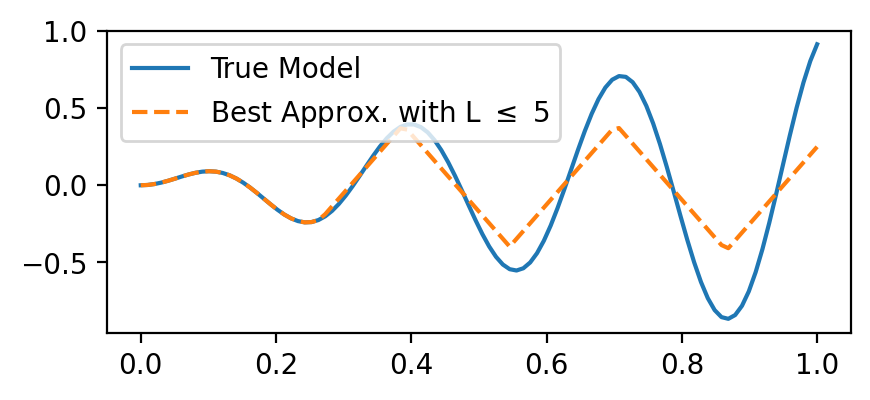

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
%matplotlib inline
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Setup parameters and model
n_grid = 100
L = 5 
def f(x):
    return x * np.sin(x * 20)

# Get true data
x = np.linspace(0, 1, num=n_grid)
y = f(x)

# Construct optimization problem and solve
A = np.zeros((n_grid, n_grid))
for i in range(n_grid):
    if i == 0:
        A[:,i] = 1
    else:
        A[i:,i] = (x[i] - x[i-1])
b = y.copy()
lower = -L * np.ones(n_grid)
lower[0] = -np.inf
upper = L * np.ones(n_grid)
upper[0] = np.inf
bounds = (lower, upper)

# Compute optimization
result = scipy.optimize.lsq_linear(A=A, b=b, bounds=bounds)
x_opt = result.x
yhat = np.dot(A, x_opt)

plt.figure(figsize=np.array([6,2.5])*0.8, dpi=200)
plt.plot(x, y, label='True Model')
plt.plot(x, yhat, '--', label='Best Approx. with L $\leq$ %g' % L)
plt.legend()
plt.savefig('best-lipschitz-illustration-updated.pdf', bbox_inches='tight', pad_inches=0)